In [30]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats as sp
from sklearn import mixture
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
from matplotlib import cm
from theano import tensor as tt
import theano

In [19]:
random.seed(50120057)

#### 시뮬레이션 데이터 생성

In [28]:
x1 = multivariate_normal.rvs([0,0])*0.5 + multivariate_normal.rvs([0,0],size = 100)*0.25
x2 = multivariate_normal.rvs([1,-2])*0.75 + multivariate_normal.rvs([0,0], size = 75)*0.25 
x3 = multivariate_normal.rvs([-3,4])*0.5 + multivariate_normal.rvs([0,0], size = 50)*0.25
x4 = multivariate_normal.rvs([2,3])*0.8 + multivariate_normal.rvs([0,0], size = 25)*0.25

X = np.concatenate([x1,x2,x3,x4])

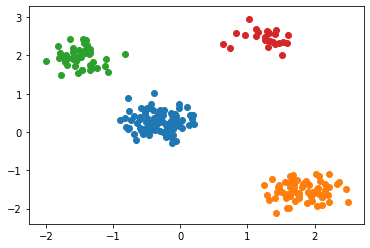

In [29]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1])
plt.scatter(x4[:,0], x4[:,1])
plt.show()

In [32]:
x = X[:,0]
y = X[:,1]
xmin = np.min(x) ; xmax = np.max(x)
ymin = np.min(y) ; ymax = np.max(y)
xx,yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x,y])
kernel = sp.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

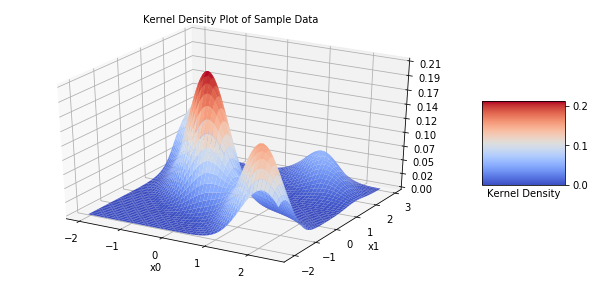

In [43]:
# Plot kernel density estimation 
fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(xx, yy, f, cmap = cm.coolwarm, linewidth = 0)

# Customize z axis
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

mate = fig.colorbar(surf, shrink = 0.5, aspect = 1)
mate.ax.set_xlabel('Kernel Density', fontsize = 10)
plt.xlabel('x0'); plt.ylabel('x1')
plt.title('Kernel Density Plot of Sample Data', fontsize = 10)
plt.show()